# Problems Notebook for Applied Statistics 2025
This notebook summarizes my journey towards solving four problems set as part of the Applied Statistics module in the HDip in Computer Science and Data Analytics. The problems cover:

1. [Extending the Lady Tasting Tea Experiment](#problem-1-extending-the-lady-tasting-tea-a-idlady_tea) - looking at combinations and permutations
2. [Normal distribution](#problem-2-normal-distribution) - what is normally distributed data and the effect of sample size on the standard deviation.
3. [t-Tests](#problem-3-t-tests) - statistically checking for difference between samples and the likelihood of failing to reject a null hypothesis.
4. [ANOVA](#problem-4-anova) - looking at ANOVA as a way to identify where a sample is different.

## Standard packages used across the problems
All the packages used across the project are listed in [requirements.txt](https://github.com/kknb1982/applied_statistics/blob/main/requirements.txt) and should be loaded into the environment using the steps laid out in the [README.md](https://github.com/kknb1982/applied_statistics/blob/b965c80369e55a65eba1f46f5a5d6e354610a6dc/README.md). The standard packages are:

* `ipython` supports the running of Python in Jupyter notebooks as outlined in the [official documentation](https://ipython.readthedocs.io/en/stable/)

* `NumPy` is the standard package used for scientific computing in Python ([see the manual](https://numpy.org/doc/2.3/)). Numpy makes it easier to work with data using [arrays](https://numpy.org/doc/2.3/user/absolute_beginners.html) to handle and understand your data.

* `SciPy` is a collection of mathematical functions built on `NumPy`. The functions and sub-packages are laid out in the [SciPy UserGuide](https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide).

* `statsmodels` is a collection of functions for conducting statistical tests and exploring statistical data as explained in the [User Guide](https://www.statsmodels.org/stable/user-guide.html)

* `matplotlib` is a commonly used package for creating visualisations of data in Python, full details are in the [User Guide](https://matplotlib.org/stable/index.html).

* `pandas` enables fast data analysis and manipulation, see the [User Guide for more information](https://pandas.pydata.org/docs/user_guide/index.html)

* `seaborn` enables the drawing of more complex and informative statistical graphs, see the [website for more information](https://seaborn.pydata.org/).

Other standard library modules are used in this notebook and these will be introduced at the point of usage.

## Problem 1: Extending the Lady Tasting Tea
Firstly, what is the Lady Tasting Tea Problem? This comes from the ["Design of Experiments"](https://archive.org/details/in.ernet.dli.2015.502684/page/n5/mode/2up) by Ronald A Fisher and states a lady can work out from tasting a cup of tea if the milk was added to the cup before or after the tea. The experiment he designed was to create eight cups of tea, half made milk first and half made tea first, and presenting them in a random order to the taster. The taster has the experiment explained so knows that four are made milk first and four are tea first. 

The null hypothesis is that she can't tell the difference between the tea making methods. There is a good explanation of [null hypothesis here](https://www.geeksforgeeks.org/maths/null-hypothesis/). This iteration of the experiment will extend the number of cups of tea to twelve with eight made tea-first and four made milk-first.

To simulate this experiment we will shuffle 12 cups with 8 made tea-first and 4 made milk-first. We will simulate a number of trials and count how often the guesser could get all four cups right by chance.

### Import the needed tools
To complete this task the following tools are needed:
* `math` to investigate combinations and permutations. Documentation about `math` is available at [https://docs.python.org/3/library/math.html](https://docs.python.org/3/library/math.html). 

* `itertools` to [create iterator blocks](https://docs.python.org/3/library/itertools.html#module-itertools). 

* `random` to randomly select which cups will have the milk added first. The full description of `random` is available at [https://docs.python.org/3/library/random.html](https://docs.python.org/3/library/random.html). 

* `numpy` to evaluate the number of unique selections, see the [user guide](https://numpy.org/doc/2.3/user/index.html#user).

* `matplotlib.pyplot` to plot the outcomes as described in the [user guide](https://matplotlib.org/stable/index.html).

In [60]:
# Mathematical functions from the math module
# https://docs.python.org/3/library/math.html
import math

# Combinatorial functions from the itertools module
# https://docs.python.org/3/library/itertools.html#module-itertools
import itertools

# Random number generation functions from the random module
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and functions from the numpy module
# https://numpy.org/doc/2.3/user/index.html#user
import numpy as np

# Plotting functions from the matplotlib module
# https://matplotlib.org/stable/index.html
import matplotlib.pyplot as plt

### Set the variables for the experiment
The number of cups of tea in total is twelve.

In [61]:
# Number of cups of tea in total
n_cups = 12

The number of the cups made tea-first is eight.

In [62]:
n_tea_first = 8

The number of the cups made milk-first is four.

In [63]:
n_milk_first = 4

### Combinations and permutations
How many different ways are there for the tester to select the four cups made tea first? This kind of experiment looks at combinations and permutations.

Permutations are the different ways the elements can be ordered. For example, a colleague was told the combination for the lock on the stationery cupboard, the remembered digits are 1, 5, 7, 9, none of the digits were repeated, but the order can't be remembered. The different orders of these digits are the permutations eg 1579, 1597, 9715...... The number of different ways of ordering these permutations is four factorial, often written as 4!. This is calculated by 4 * 3 * 2 * 1 = 24. It's going to take a while to get that stationery! For this experiment we do not mind the order in which the cups of tea are selected.

Combinations is a selection of a number of elements from the set. The order does not matter and the same element cannot be selected twice. If we take our stationery cupboard lock again and all we know if no digit is repeated in the code, but no-one knows any of the digits, there are a large number of combinations eg  1234, 1345, 1456 etc. The order does not matter in combinations.

In our tea experiment we are interested in the number of combinations that can be selected from the 12 cups, we are not interested in the order they are selected (permutations). 

In the [`math` library](https://docs.python.org/3/library/math.html) there is the [`comb`](https://docs.python.org/3/library/math.html#math.comb) function which will return the number of ways to choose a set number of items (often denoted as *k*) from *n* items without repeating items or order.  `math.comb()` is written mathematically as: $$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$ In our example n = number of cups in total which is 12 and k = number of cups with milk in first which is 4. The description of `math.comb()` is available at [https://docs.python.org/3/library/math.html#math.comb](https://docs.python.org/3/library/math.html#math.comb).

Let's use the function to work out the number of ways of selecting four cups (those made milk-first) from twelve.

In [64]:
# Number of ways of selecting four cups from twelve.
# https://docs.python.org/3/library/math.html#math.comb
n_ways = math.comb(n_cups, n_milk_first)

# Show the result
n_ways

495

There are 495 different ways of selecting the four cups made milk first. So how does `math.comb` calculate this? If we label each of the cups one to twelve and put out four coasters, the tester is asked to put the milk-first cups on the coasters. For example, cups 3,4,7,11 might be selected. The cups could be placed on the coasters in any order, so 3 4 7 11 is the same and 7 4 11 3. Once a coaster is full it reduces the number of cups to choose from by one. To calculate the number of ways of selecting four cups from twelve is to multiply the number of cups to choose from to fill each coaster. So for coaster A, there are 12 choice and coaster B 11 choices and so on, until all 4 coasters are filled.

In [65]:
# total ways of selecting 4 cups from 12
no_ways_ordered = 12 * 11 * 10 * 9

# Show the result
no_ways_ordered

11880

We don't care about the order so this reduces the number of options. The number of permutations for the four cups is 4! so 4 * 3 * 2 * 1

In [66]:
# Number of ways of putting the four cups on the coasters
n_arrangements = 4 * 3 * 2 * 1

# Show the result
n_arrangements

24

To get the number of ways of selecting the four cups with no regard to the order they are selected is calculated by dividing the number of ways ordered by the number of arrangements of those selected, so 11880 / 24. To divide in python we use [`//`](https://www.geeksforgeeks.org/python/division-operators-in-python/) when dividing whole numbers (integers).

In [67]:
# Number of combinations of selecting 4 cups from 12
n_combinations = no_ways_ordered // n_arrangements

# Show the result
n_combinations

495

This step by step approach matches the `math.comb()` function. This maths could also have been completed by using `math.factorial` described at [https://docs.python.org/3/library/math.html#math.factorial](https://docs.python.org/3/library/math.html#math.factorial). Factorial means multiplying from the start integer sequentially down to one. The notation is the start number followed by !. Therefore, the number of cups milk-first is calculated by 4! or 4 x 3 x 2 x 1. There is a good decription of factorial numbers at [https://www.geeksforgeeks.org/maths/factorial/](https://www.geeksforgeeks.org/maths/factorial/)

In [68]:
# Another way of calculating the number of arrangements of 4 cups is to use the factorial function from the math library
# https://docs.python.org/3/library/math.html#math.factorial
no_arrangements = math.factorial(n_milk_first)
no_arrangements

24

We need to know the number of ways of organising the tea-first cups.

In [69]:
# Calculate the number of ways of organising the tea first cups
no_ways_tea_first = math.factorial(n_tea_first)
no_ways_tea_first

40320

There are 12 cups, so work out the number of ways of calculating the ordering of the 12 cups, calculate `12!`.

In [70]:
# Calculate the number of ways of organising all the cups
no_ways = math.factorial(n_cups)
no_ways


479001600

To calculate the number of combinations of selecting the 4 cups from 12. We divide the number of ways of organising all the cups by the product of the number of arrangement of milk-first and tea-first.

In [71]:
# Calculate the number of combinations of selecting 4 cups from 12
number_combinations = no_ways // (no_arrangements * no_ways_tea_first)

# Show the result
number_combinations

495

Using this different methodology, we again get the answer 495. Now let's set up our extended experiment and simulate the outcomes.

### Setting up the experiment
The first task is assigning cup labels. `range` is used to generate a sequence of numbers, up to the number of cups as described in the [user documentation](https://docs.python.org/3/library/functions.html#func-range). The output of this is then turned into a `list` which can be iterated through in later steps, [user documentation for lists](https://docs.python.org/3/library/stdtypes.html#typesseq-list).

In [72]:
# Assign the cup labels
# https://docs.python.org/3/library/stdtypes.html#typesseq-list
# https://docs.python.org/3/library/functions.html#func-range

labels = list(range(n_cups))

# Show the result
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

To calculate the number of way of selecting the number of cups made milk first out of all the cups we can use the function `itertools.combinations` ([official documentation])(https://docs.python.org/3/library/itertools.html#itertools.combinations). 

In [73]:
# Show the different ways of selecting the cups made milk first from all the cups
# https://docs.python.org/3/library/itertools.html#itertools.combinations
combs = list(itertools.combinations(labels, n_milk_first))

# Show the result
combs

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 2, 8),
 (0, 1, 2, 9),
 (0, 1, 2, 10),
 (0, 1, 2, 11),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 3, 8),
 (0, 1, 3, 9),
 (0, 1, 3, 10),
 (0, 1, 3, 11),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 4, 7),
 (0, 1, 4, 8),
 (0, 1, 4, 9),
 (0, 1, 4, 10),
 (0, 1, 4, 11),
 (0, 1, 5, 6),
 (0, 1, 5, 7),
 (0, 1, 5, 8),
 (0, 1, 5, 9),
 (0, 1, 5, 10),
 (0, 1, 5, 11),
 (0, 1, 6, 7),
 (0, 1, 6, 8),
 (0, 1, 6, 9),
 (0, 1, 6, 10),
 (0, 1, 6, 11),
 (0, 1, 7, 8),
 (0, 1, 7, 9),
 (0, 1, 7, 10),
 (0, 1, 7, 11),
 (0, 1, 8, 9),
 (0, 1, 8, 10),
 (0, 1, 8, 11),
 (0, 1, 9, 10),
 (0, 1, 9, 11),
 (0, 1, 10, 11),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 3, 6),
 (0, 2, 3, 7),
 (0, 2, 3, 8),
 (0, 2, 3, 9),
 (0, 2, 3, 10),
 (0, 2, 3, 11),
 (0, 2, 4, 5),
 (0, 2, 4, 6),
 (0, 2, 4, 7),
 (0, 2, 4, 8),
 (0, 2, 4, 9),
 (0, 2, 4, 10),
 (0, 2, 4, 11),
 (0, 2, 5, 6),
 (0, 2, 5, 7),
 (0, 2, 5, 8),
 (0, 2, 5, 9),
 (0, 2, 5, 10),
 (

This has produced so many results, `len` can be used to count the number of combinations. `len` counts the number of items in an object as described at [https://docs.python.org/3/library/functions.html#len](https://docs.python.org/3/library/functions.html#len)

In [74]:
# Number of combinations
# https://docs.python.org/3/library/functions.html#len
len(combs)

495

Brilliant, we got 495 combinations, the same as when we calculated the outcome purely mathematically by using `math.comb()`. 

To randomly choose which ones will have the milk added first use the python function `random.sample`, see the [official documentation](https://docs.python.org/3/library/random.html#random.sample). `random.sample()` will return a list items randomly selected from the group of the length specified. So the two arguments needed are what do you want me to select from and how many do you want. For this experiment the list is `labels` and the number to select is `n_milk_first`.

In [75]:
# Select which cups have milk added first
# https://docs.python.org/3/library/random.html#random.sample
labels_milk_first = random.sample(labels, n_milk_first)

# Show the result
labels_milk_first

[8, 2, 1, 4]

The cup number listed above, have been randomly chosen to be made milk-first. In selecting the cups, it does not matter the order they are selected, only that they are put in the group proposed as being made milk-first.

### The null hypothesis
A null hypothesis is the commonly accepted fact (the lady can tell which cups are made milk-first) and our experiment is designed to test whether this is true. The alternate hypothesis is that she cannot tell which are made milk-first and the selections are basically random. There is a great description of what is a null hypothesis and examples at [https://www.statisticshowto.com/probability-and-statistics/null-hypothesis/](https://www.statisticshowto.com/probability-and-statistics/null-hypothesis/).

Let's make our list of cups with the milk added first into a `set`, [see official documentation](https://docs.python.org/3/tutorial/datastructures.html#sets).

In [76]:
# Turn labels_milk_first into a set
# https://docs.python.org/3/tutorial/datastructures.html#sets
set_milk_first = set(labels_milk_first)

# Show the result
set_milk_first

{1, 2, 4, 8}

Now let's calculate the overlap between each element of the possible combinations saved as combs and set_milk_first. We can do this by first creating an empty list called no_overlaps.

In [77]:
# create an empty list to hold the number of overlaps
no_overlaps = []

Then loop through the combinations, in each loop take one of the combinations and turn it into a set and find out if there is an overlap with the milk-first set. The answer of this is then printed to the notebook, showing the combination, the number of overlapping items and which items overlap. The outcome of these calculations are added to the no_overlaps list.

In [78]:
# Loop through the combinations.
for comb in combs:
    # Turn comb into a set.
    s1 = set(comb)
    # Figure out where comb overlaps with set_milk_first.
    overlap = s1.intersection(set_milk_first)
    # Show the combination and the overlap.
    print(comb, len(overlap), overlap)
    # Append overlap to no_overlaps.
    no_overlaps.append(len(overlap))

(0, 1, 2, 3) 2 {1, 2}
(0, 1, 2, 4) 3 {1, 2, 4}
(0, 1, 2, 5) 2 {1, 2}
(0, 1, 2, 6) 2 {1, 2}
(0, 1, 2, 7) 2 {1, 2}
(0, 1, 2, 8) 3 {8, 1, 2}
(0, 1, 2, 9) 2 {1, 2}
(0, 1, 2, 10) 2 {1, 2}
(0, 1, 2, 11) 2 {1, 2}
(0, 1, 3, 4) 2 {1, 4}
(0, 1, 3, 5) 1 {1}
(0, 1, 3, 6) 1 {1}
(0, 1, 3, 7) 1 {1}
(0, 1, 3, 8) 2 {8, 1}
(0, 1, 3, 9) 1 {1}
(0, 1, 3, 10) 1 {1}
(0, 1, 3, 11) 1 {1}
(0, 1, 4, 5) 2 {1, 4}
(0, 1, 4, 6) 2 {1, 4}
(0, 1, 4, 7) 2 {1, 4}
(0, 1, 4, 8) 3 {8, 1, 4}
(0, 1, 4, 9) 2 {1, 4}
(0, 1, 4, 10) 2 {1, 4}
(0, 1, 4, 11) 2 {1, 4}
(0, 1, 5, 6) 1 {1}
(0, 1, 5, 7) 1 {1}
(0, 1, 5, 8) 2 {8, 1}
(0, 1, 5, 9) 1 {1}
(0, 1, 5, 10) 1 {1}
(0, 1, 5, 11) 1 {1}
(0, 1, 6, 7) 1 {1}
(0, 1, 6, 8) 2 {8, 1}
(0, 1, 6, 9) 1 {1}
(0, 1, 6, 10) 1 {1}
(0, 1, 6, 11) 1 {1}
(0, 1, 7, 8) 2 {8, 1}
(0, 1, 7, 9) 1 {1}
(0, 1, 7, 10) 1 {1}
(0, 1, 7, 11) 1 {1}
(0, 1, 8, 9) 2 {8, 1}
(0, 1, 8, 10) 2 {8, 1}
(0, 1, 8, 11) 2 {8, 1}
(0, 1, 9, 10) 1 {1}
(0, 1, 9, 11) 1 {1}
(0, 1, 10, 11) 1 {1}
(0, 2, 3, 4) 2 {2, 4}
(0, 2, 3, 5) 1 {2}
(0, 2

Due to the number of potential ways of selecting the four cups, this is a very long list. If we only print the number of overlaps we can see that getting more than two cups correctly identified as made milk-first is quite rare, but how rare.

In [79]:
# Show the overlaps
print(no_overlaps)

[2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 4, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 

This can be calculated using the `numpy` function `unique`, see [official documentation](https://numpy.org/doc/stable/reference/generated/numpy.unique.html). `np.unique` identifies the unique values in the array and by adding the parameter `return_counts` we can see the number of times that unique value is returned. This is far easier than looking at a full list.

In [80]:
# Count the number of times each overlap occurs.
# https://numpy.org/doc/stable/reference/generated/numpy.unique.html
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1], dtype=int64))

To make this information even easier to understand we can plot it as a bar chart using `matplotlib.pyplot.subplots`, see [official documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html). The parameter `figsize` sets the size of the plot.

Then to this figure we plot our count data, setting the number of cups correctly identified as milk-first as the x-axis and the number of times that combination occurs on the y-axis.

Text(0.5, 0, 'Number of Cups Correctly Identified as Milk-First')

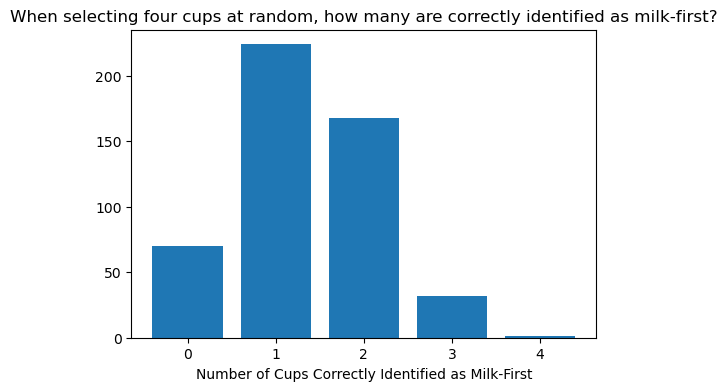

In [81]:
# Create a blank figure
fig, ax = plt.subplots(figsize=(6, 4))

# Create a bar chart with our count data
ax.bar(counts[0], counts[1])
plt.title('When selecting four cups at random, how many are correctly identified as milk-first?')
plt.xlabel('Number of Cups Correctly Identified as Milk-First')

From our count, it is clear there is only 1 way to get all four cups correctly identified. Using the `n_ways` variable created earlier we can see that the probability of making the selection with all four cups correctly identified as milk-first is quite rare.

In [82]:
# The probability of getting all four correct by chance is 1 in 495.
1/n_ways

0.00202020202020202

In the original experiment the probability of selecting all four cups correctly was 0.14, so this extension of the test has made it far harder to correctly identify the four cups made milk-first by chance alone. In the original experiment the chance of getting three or more cups correctly identified was 0.24 and hence Fisher said that all four cups must be correctly identified as being made milk-first to be significant. Let's see what the chance of 3 or more cups being correct is in our extended experiment.

In [83]:
# The probability of getting three or more correct by chance is
(1 + 33) / n_ways

0.06868686868686869

The probability of getting at least three cups correct in our extended experiments is 0.0687. 

When testing a null hypothesis we use the p-value. The smaller the p-value means the results may not support the null hypothesis. The cut-off used is often 0.05. How to calculate the p-value and its significance is well explained in [https://www.simplypsychology.org/p-value.html](https://www.simplypsychology.org/p-value.html) and we will be looking at this in more detail in the later problems. 

In the original experiment Fisher calculated that the probability of correctly identifying all cups by chance of 1 in 70, (a p-value of less than 0.05), so he was satisfied that that the null hypothesis could be rejected and state that the lady could tell if the tea was made milk-first.

In our simulation, the probability of getting 3 or more cups correctly identified as being made milk-first by chance is small, but it is over the normal 0.05 threshold, so to be confident that the null hypothesis is true we will still need to see all four cups correctly identified.

## Problem 2: Normal Distribution
[Normal distribution](https://www.geeksforgeeks.org/maths/normal-distribution/) is the most common distribution of data variables. Normal distribution  is often used to represent a larger number of random variables and describes many natural phenomena such as the height of adults. The distribution is symmetrical about its centre and makes a distinctive bell curve.

In this problem we are going to generate 100,000 samples of size 10. Then for each sample, compute the standard deviation with sample standard deviation of one and population standard deviation of 0. To help compare the outcomes they will be plotted.

First let's import the tools we need:
* `numpy` to complete standard mathematical calculations, [official documentation](https://numpy.org/doc/2.3/)
* `matplotlib.pyplot` to plot the data, [see the user guide](https://matplotlib.org/stable/index.html)
* `scipy.stats` for statistics, [see the user guide](https://docs.scipy.org/doc/scipy/reference/stats.html)
* `statsmodels` for the statistical modelling, see the [user guide](https://www.statsmodels.org/stable/user-guide.html)
* `pandas` for data handling, see [official documentation](https://pandas.pydata.org/docs/)
* `seaborn` for visualising more complex data, see [official documentation](https://seaborn.pydata.org/)

In [84]:
# Mathematical calculations for arrays from the numpy module
# https://numpy.org/doc/2.3/
import numpy as np

# Plotting functions from the matplotlib module
# https://matplotlib.org/stable/index.html
import matplotlib.pyplot as plt

# Statistical functions from the scipy.stats module
# https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy.stats as stats

# Statistical modelling functions from the statsmodels module
# https://www.statsmodels.org/stable/user-guide.html
import statsmodels as sm

# Data manipulation functions from the pandas module
# https://pandas.pydata.org/docs/
import pandas as pd

# Data visualization functions from the seaborn module
# https://seaborn.pydata.org/
import seaborn as sns

### Probability Density Function
First, let's look into what the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) is in more detail. A normal distribution is a symmetrical, bell shaped curve. When describing a normal distribution we normally denote the mean as $\mu$ and the variance described by $\sigma^{2}$. $\sigma$ is the standard deviation. 

When plotted as a graph the area under the curve represents the probability, $\mu$ the peak of the curve and the spread by $\sigma^{2}$. A low $\sigma^{2}$ is a sharp peak and high $\sigma^{2}$ is a more spread-out curve. A standard normal distribution has a $\sigma^{2}$ value of 1. 

Now let's create a normal distribution and plot this as a curve on the above plot.

  
The probability density function (PDF) of a normal distribution is:

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} \, e^{ -\frac{(x - \mu)^2}{2\sigma^2} }
$$

Where:
- $\mu$ = mean  
- $\sigma$ = standard deviation  
- $x$ = variable

We can create a function for this equation that takes in the three parameters, $x$, $\mu$ and $\sigma$ to do the calculation. If you are not familiar with defining a function [w3 schools has a great resource](https://www.w3schools.com/python/python_functions.asp). To solve the equation we will need `numpy.sqrt`, [see the official documentation](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html) and `numpy.pi`, $\pi$[for pi](https://numpy.org/doc/stable/reference/constants.html#numpy.pi) to calculate the normalisation constant. The result of this is then multiplied by the exponential part of the equation. Exponents can be calculated in python using [`numpy.exp`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html#numpy.exp). Exponents are well described in [https://www.cuemath.com/algebra/exponents/](https://www.cuemath.com/algebra/exponents/).

$\sigma$ is the standard deviation of the data. Standard deviation describes the spread of the data away from the mean. A low standard deviation means the values are relatively consistent and close to the mean. A high standard deviation mean the data points are more spread out. There is a helpful description of standard deviation at [https://www.geeksforgeeks.org/maths/standard-deviation-formula/](https://www.geeksforgeeks.org/maths/standard-deviation-formula/). The mathematical formula for standard deviation is:

$$
\sigma = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n}}
$$

where:
- $\bar{x}$ is the mean
- n = number of observations

First, let's define a function for the normal distribution. When coding in Python use the English names for these Greek letters so $\mu$ is `mu` and $\sigma$ is `sigma`.


In [85]:
# Define a function for the normal distribution
# https://en.wikipedia.org/wiki/Normal_distribution
# Define the function with the parameters x, mu and sigma
def f(x, mu=0.0, sigma=1.0):
  """Calculate the probability density function of a normal distribution.
    
    Parameters:
        x: Variable value(s)
        mu: Mean of the distribution (default 0.0)
        sigma: Standard deviation (default 1.0)
        
    Returns:
        The PDF value(s) at x
    """
  # Calculate the normalisation constant.
  # https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html
  # https://numpy.org/doc/stable/reference/constants.html#numpy.pi
  
  norm = 1.0 / np.sqrt(2.0 * np.pi * sigma**2)
  
  # Return the result f(x)
  # https://numpy.org/doc/stable/reference/generated/numpy.exp.html#numpy.exp
  return norm * np.exp(-(x - mu)**2 / (2.0 * sigma**2))

Now let's test the function.

In [86]:
# Test the function.
f(0.0)

0.3989422804014327

To plot the normal distribution we create an x range of data with `numpy.linspace` [official documentation](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) which returns evenly spaced numbers over a specified interval. The function requires two parameters, where to start and where to stop. How many returns is automatically set to 50, but for a nice smooth curve that runs from one limit to another I'm going to set it to 1001. 

In [87]:
# Create an x range
# https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
x = np.linspace(-5.0, 5.0, 1001)

# Get y values.
y = f(x)

# Show.
x,y

(array([-5.  , -4.99, -4.98, ...,  4.98,  4.99,  5.  ]),
 array([1.48671951e-06, 1.56286711e-06, 1.64275059e-06, ...,
        1.64275059e-06, 1.56286711e-06, 1.48671951e-06]))

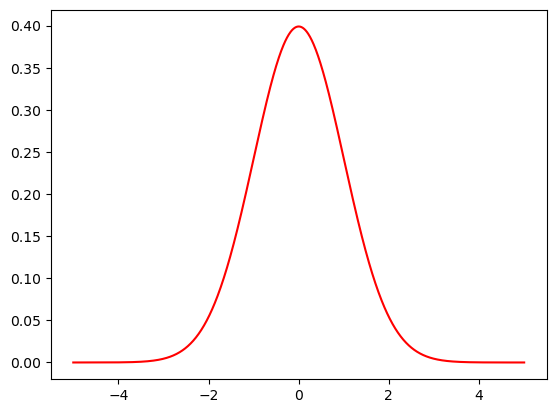

In [88]:
# Create an empty plot.
# https://matplotlib.org/stable/users/explain/axes/index.html
fig, ax = plt.subplots()

# Plot the function.
ax.plot(x, y, 'r')

#### Arithmetic mean
The mean is sum of a collection of numbers divided by the count of numbers in the collection. This can be calculated with `numpy.mean`, the [official documentation](https://numpy.org/doc/stable/reference/generated/numpy.mean.html#numpy.mean) describes the possible parameters. For now let's run function on our generated data.

In [89]:
# calculate the mean
# https://numpy.org/doc/stable/reference/generated/numpy.mean.html#numpy.mean
mean = np.mean(x)

# Show the mean
mean

0.0

#### Standard deviation
The [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) shows the spread of the data, it acts as a measure of the amount of variation of the values around the mean.

$$
\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}
$$

where:
- $\sigma$ = population standard deviation
- $\mu$ is the population mean
- N is the number of observations

To calculate the standard deviation in Python we can use `numpy.std`, see the [official documentation for more details on the parameters](https://numpy.org/doc/stable/reference/generated/numpy.std.html). 

In [90]:
# Calculate the standard deviation
# https://numpy.org/doc/stable/reference/generated/numpy.std.html#numpy.std
sigma = np.std(x)

# Show the standard deviation
sigma

2.8896366553599777

Now let's add all this data to our plot.

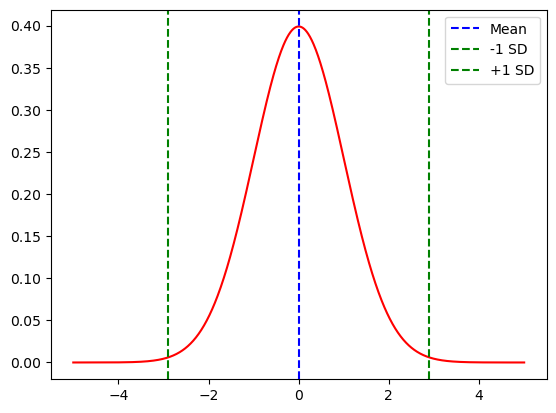

In [91]:
# Create an empty plot.
# https://matplotlib.org/stable/users/explain/axes/index.html
fig, ax = plt.subplots()

# Plot the function.
ax.plot(x, y, 'r')

# Plot the mean
ax.axvline(mean, color='b', linestyle='--', label='Mean')

# Plot the standard deviations
ax.axvline(mean - sigma, color='g', linestyle='--', label='-1 SD')
ax.axvline(mean + sigma, color='g', linestyle='--', label='+1 SD')

# Show the legend
ax.legend()

### Using numpy normal function
Instead of defining the function we could use `numpy.random.normal` [see official documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). This randomly generates data for a normal distribution in line with the given parameters. The documentation recommends that we should generate our own random number generator, but for now let's look at `numpy.random.normal`. The parameters are:
* loc = centre of the distribution
* scale = spread or  standard deviation of the distribution
* size = sets the number of the outputs

In [92]:
# Randomly generate data for a normal distribution
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
np.random.normal(1,0.5,10)

array([0.73276463, 1.12279444, 1.24506429, 1.23061741, 0.39146799,
       0.57910353, 1.22145147, 0.05788696, 0.94087872, 0.64772285])

Now get the y values using the function f we previously described.

In [93]:
# Get y values
y = f(x, mu=0.0, sigma=1.0)

Now plot it all on one chart.

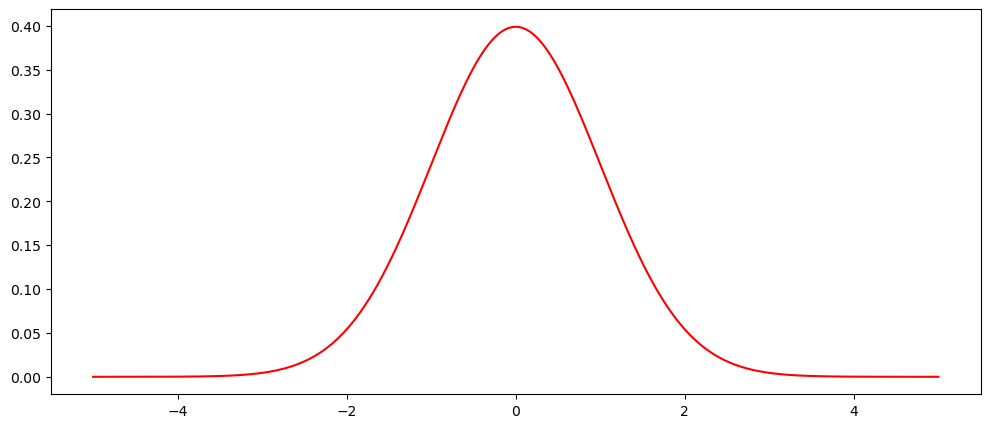

In [94]:
# Create the empty plot
fig, ax = plt.subplots(figsize=(12, 5))

# Plot the function for the binomial distribution
ax.plot(x, y, 'r-')


### Generate a normal distribution of 10 data points, 100,000 times
Now let's use `numpy.random.normal` to generate a normal distribution with 10 data points, 100,000 times. The [official documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) for this function shows it takes three parameters loc, scale and size. Loc is the mean or centre of the distribution, scale is the standard deviation or spread of the data and size gives us the number of outputs. Creating these outputs mimics sampling a population. This is often the way surveys and medical trials work, by collecting an intensive data set from a small subset to make assumptions about a larger population. 

In [95]:
# Generate a random normal sample with groups of 10 data points
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
data = np.random.normal(size=(100000,10))

# Show
data

array([[-0.37245608,  0.3672766 , -0.65380612, ..., -0.3307657 ,
        -0.53651613,  1.170128  ],
       [ 1.0391251 , -0.04697118,  0.16323441, ..., -1.45806792,
        -0.07728374, -1.58640049],
       [-0.25130959, -0.80327901, -1.21687464, ...,  0.68798697,
        -0.83429377,  0.45742079],
       ...,
       [ 0.34984551, -0.95489201, -0.25416972, ..., -0.38874463,
         1.68333057,  0.51197145],
       [ 0.59629732, -1.64143464,  0.11786676, ..., -0.69659633,
         0.38858388,  0.91409341],
       [-1.69240109, -1.30190881, -1.52796864, ..., -0.58076672,
         1.14384736, -1.56431558]])

To calculate the mean of each of the samples we set the `numpy.mean` parameter to `axis=1` , [see official documentation](https://numpy.org/doc/stable/reference/generated/numpy.mean.html). 

In [96]:
# Calculate the mean
# https://numpy.org/doc/stable/reference/generated/numpy.mean.html
means = np.mean(data, axis=1)

# Show the mean
means

array([-0.0054032 , -0.4656597 , -0.30421958, ...,  0.22357426,
       -0.37406864, -0.32840695])

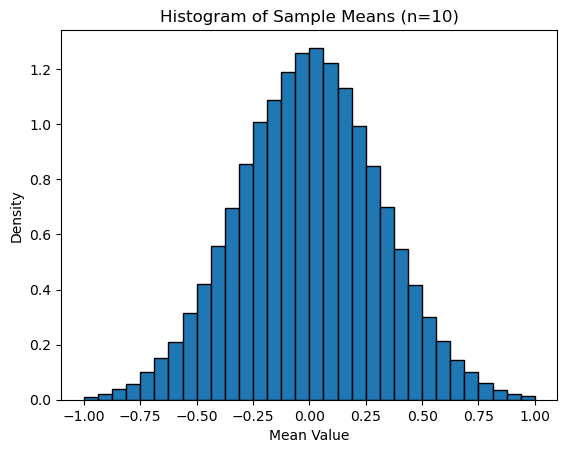

In [97]:
# Create a blank figure
fig, ax = plt.subplots()

# Create a histogram of the means data
# https://matplotlib.org/stable/plot_types/stats/hist_plot.html
# https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
ax.hist(means, edgecolor='black', bins=np.linspace(-1.0,1.0,33), density=True)

# Label the plot
plt.title('Histogram of Sample Means (n=10)')
plt.xlabel('Mean Value')
plt.ylabel('Density')

# Show the data
plt.show()

This plot shows that each of the sample picked my have a variation in mean, but when the data for multiple samples are plotted they centre around the mean.

### Sample and population standard deviations
The problem asks for the sample standard deviation to be set to `ddof=1` and with `ddof=0` for population standard deviation. What is the difference between population and sample standard deviations? There is a good description of the difference on [statology](https://www.statology.org/population-vs-sample-standard-deviation/).

**Population Standard Deviation Formula:**

$$
\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}
$$

Where:
- $\sigma$ = population standard deviation
- $\mu$ = population mean
- $N$ = number of observations in the population
- $x_i$ = each individual value

**Sample Standard Deviation Formula:**
$$
s = \sqrt{\frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n - 1}}
$$

The sample deviation should be used when the dataset representation a sample taken from a larger population of interest.The difference between the two formula is that for the sample standard deviation the divisor is n-1 rather than N. This is because when we calculate the sample standard deviation, we tend to underestimate the actual variability of the population.

### The effect of the different ddof values
Let's demonstrate the effect of the ddof on some sample data created with `numpy.array`, see [official documentation](https://numpy.org/doc/stable/reference/generated/numpy.array.html).

In [98]:
# Create data array
# https://numpy.org/doc/stable/reference/generated/numpy.array.html
ddof_example = np.array([1, 2, 3, 4, 5])


Now calculate the standard deviation of that data with `ddof=1` using `numpy.std`, see [official documentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html.)

In [99]:
# Calculate the standard deviation with ddof=1
# https://numpy.org/doc/stable/reference/generated/numpy.std.html
std_ddof1 = np.std(ddof_example, ddof=1)

Complete the same action with the same data, but this time with a ddof of 0.

In [ ]:
# Calculate the standard deviation with ddof=0
# https://numpy.org/doc/stable/reference/generated/numpy.std.html
std_ddof0 = np.std(ddof_example, ddof=0)

Now let's plot the outcomes on a simple chart.

<BarContainer object of 2 artists>

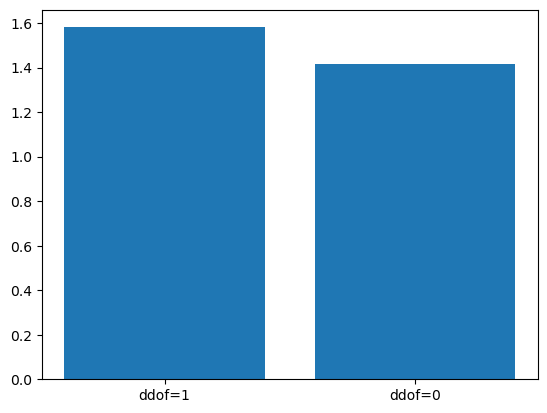

In [101]:
# Plot the results
labels = ['ddof=1', 'ddof=0']
std_values = [std_ddof1, std_ddof0]
fig, ax = plt.subplots()
ax.bar(labels, std_values)


From this chart, we can see that the ddof of 1 is showing a higher standard deviation. 

### Standard deviations for our data set using ddof=0 and ddof=1
Let's process the previously generated data and compute the standard deviation for each sample using these two different `ddof` values, using `numpy.std`, [see official documentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html)

In [102]:
# Compute standard deviations for each sample using dd0f=0
# https://numpy.org/doc/stable/reference/generated/numpy.std.html
sample_sd_pop = np.std(data, axis=1, ddof=0)

# Compute standard deviations for each sample using dd0f=1
# https://numpy.org/doc/stable/reference/generated/numpy.std.html
sample_sd_sample = np.std(data, axis=1, ddof=1)

print(f"Mean of population SD estimates: {np.mean(sample_sd_pop):.4f}")
print(f"Mean of sample SD estimates: {np.mean(sample_sd_sample):.4f}")
print(f"True population standard deviation: 1.0000")

Mean of population SD estimates: 0.9244
Mean of sample SD estimates: 0.9744
True population standard deviation: 1.0000


This shows that the mean of the population standard deviation estimates is lower and further away from the true population standard deviation. 

Let's plot this information on the same axes to visualise the difference. To make the two datasets easier to visualise when overlayed we can change the parameter `alpha` to increase transparency and set the `color` for each dataset, [see official documentation](https://matplotlib.org/stable/plot_types/stats/hist_plot.html).

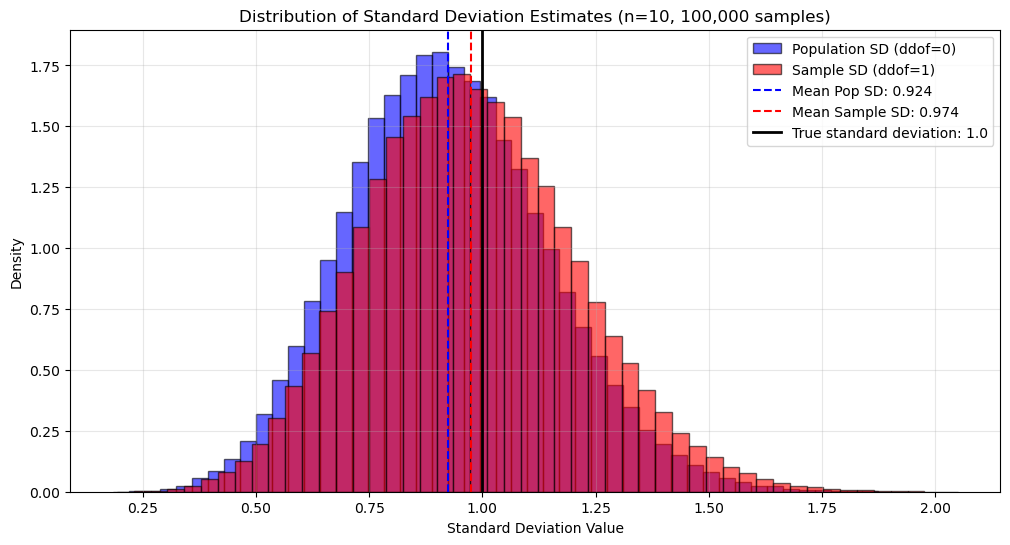

In [103]:
# Create a blank figure
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig, ax = plt.subplots(figsize=(12, 6))

# Plot both histograms with transparency
# https://matplotlib.org/stable/plot_types/stats/hist_plot.html
ax.hist(sample_sd_pop, bins=50, alpha=0.6, label='Population SD (ddof=0)', color='blue', density=True, edgecolor='black')
ax.hist(sample_sd_sample, bins=50, alpha=0.6, label='Sample SD (ddof=1)', color='red', density=True, edgecolor='black')

# Add vertical lines showing the means
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html
ax.axvline(np.mean(sample_sd_pop), color='blue', linestyle='--', label=f'Mean Pop SD: {np.mean(sample_sd_pop):.3f}')
ax.axvline(np.mean(sample_sd_sample), color='red', linestyle='--', label=f'Mean Sample SD: {np.mean(sample_sd_sample):.3f}')
ax.axvline(1.0, color='black', linestyle='-', linewidth=2, label='True standard deviation: 1.0')

# Setting labels and title
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html
ax.set_xlabel('Standard Deviation Value')
ax.set_ylabel('Density')
ax.set_title('Distribution of Standard Deviation Estimates (n=10, 100,000 samples)')
ax.legend()
ax.grid(True, alpha=0.3)

This chart may actually look better and the code be simpler if `seaborn` was used. `Seaborn` uses comparatively simple syntax, which can be easier to read, it is also more effective at handling Pandas dataframes. There is a really good article at [https://www.geeksforgeeks.org/python/difference-between-matplotlib-vs-seaborn/](https://www.geeksforgeeks.org/python/difference-between-matplotlib-vs-seaborn/) to help decide when to use Matplotlib or Seaborn.

To plot the data as a histogram again let's use `seaborn.histplot`, see [official documentation](https://seaborn.pydata.org/generated/seaborn.histplot.html). With this function we can set the parameter `kde` to True to automatically draw a smooth line for the distribution. Setting the `stat` to density means that the total area of the histogram equals 1.0. 

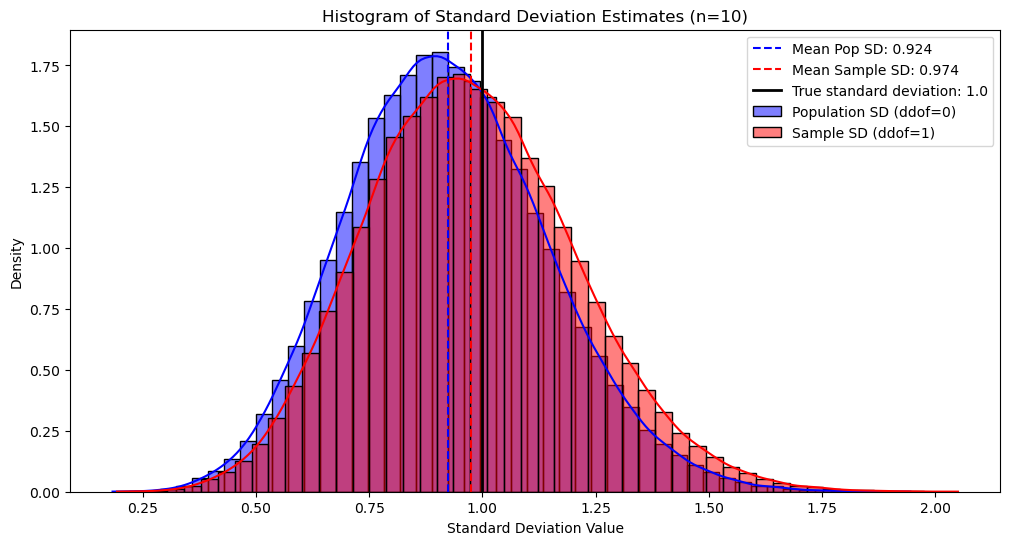

In [104]:
# Create a blank figure
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data using seaborn
# https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(sample_sd_pop, bins=50, kde=True, label='Population SD (ddof=0)', color='blue', stat='density')
sns.histplot(sample_sd_sample, bins=50, kde=True, label='Sample SD (ddof=1)', color='red', stat='density')

# Add vertical lines showing the means
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html
ax.axvline(np.mean(sample_sd_pop), color='blue', linestyle='--', label=f'Mean Pop SD: {np.mean(sample_sd_pop):.3f}')
ax.axvline(np.mean(sample_sd_sample), color='red', linestyle='--', label=f'Mean Sample SD: {np.mean(sample_sd_sample):.3f}')
ax.axvline(1.0, color='black', linestyle='-', linewidth=2, label='True standard deviation: 1.0')

# Label the plot
plt.title('Histogram of Standard Deviation Estimates (n=10)')
plt.xlabel('Standard Deviation Value')
plt.legend()

So by using seaborn it was far easier to add a line showing the data trend, plot it as a density plot and have the legend show the actual means.

### Analysis of Results
This plot indicates that the standard deviation using the population standard deviation has moved further away from the true standard deviation than when using `ddof=1`. It shows that the population standard deviation (ddof=0) consistently underestimates the true population standard deviation (σ = 1.0). `ddof=1` provides an unbiased estimate for variance with the standard deviation much closer to the true value. This change is called bias. When the means are reviewed, the population standard deviation (ddof=0) is approximately 0.92, when the sample deviation is around 0.97 and the true deviation is 1.0.  

The shape of the two plots are very similar, but the population standard deviation is slightly skewed to the left and the data for the sample standard deviation is showing slightly higher variance.

### Is a bigger sample more accurate?
A bigger sample size should reduce the bias. Let's test this theory, with sample size 10 as before, plus 20, 50 and 100. First let's create a variable for the sample sizes and the number of samples.

In [105]:
# Set the variable for sample sizes
sample_sizes = [10, 20, 50, 100]

# Set the variable for the number of samples
n_samples = 100000

Create a blank `list` to hold the information, see [official documentation](https://docs.python.org/3/tutorial/datastructures.html).

In [106]:
# Create a list to hold records
# https://docs.python.org/3/tutorial/datastructures.html
records = []

Now iterate over the sample sizes using a `for` loop([see official documentation](https://wiki.python.org/moin/ForLoop)) to generate normal data for each sample size using `numpy.random.normal`,  [see official documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). Then for each sample size calculate the standard deviation using `ddof=1` and `ddof=0`, [see official documentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html). 

Use `extend()` to add the data to the records list, [see official documentation](https://docs.python.org/3.10/tutorial/datastructures.html?highlight=list%20extend). `extend()` is used as we are adding multiple elements to a list, `append()` would be used where there is a single element to be added.

In [107]:
# Iterate over sample sizes and compute standard deviations
# https://wiki.python.org/moin/ForLoop
for n in sample_sizes:
    # Generate random samples
    # https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
    samples = np.random.normal(size=(n_samples, n))
    
    # Calculate population and sample standard deviations
    # https://numpy.org/doc/stable/reference/generated/numpy.std.html
    pop_sd = samples.std(axis=1, ddof=0)
    samp_sd = samples.std(axis=1, ddof=1)
    
    # Add records to the list
    # https://docs.python.org/3.10/tutorial/datastructures.html?highlight=list%20extend
    records.extend([
        *[(n, "Population SD (ddof=0)", v) for v in pop_sd],
        *[(n, "Sample SD (ddof=1)", v) for v in samp_sd],
    ])

To make the data easier to work with let's save it to a `pandas.DataFrame`, see [official documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). We can use the parameter `columns` to set the header for the columns in the dataframe.

In [108]:
# Convert records to a DataFrame
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
df_samples = pd.DataFrame(records, columns=["Sample Size", "Estimator", "SD"])

# Show the first few rows of the DataFrame
df_samples.head()

,Sample Size,Estimator,SD
0,10,Population SD (ddof=0),0.970381
1,10,Population SD (ddof=0),0.604238
2,10,Population SD (ddof=0),0.917279
3,10,Population SD (ddof=0),0.998798
4,10,Population SD (ddof=0),0.992221


A histogram would look really confusing for this data, with so many overlapping plots, so instead we will use a boxplot. Box plots clearly show the distribution of numerical data and any skewing. The plot shows the minimum value, first quartile, median, thrid quartile and maximum value on one simple plot. There is a good description of boxplots at [https://www.simplypsychology.org/boxplots.html](https://www.simplypsychology.org/boxplots.html). 

Let's plot the data using `seaborn.boxplot`, see [official documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). In seaborn, the parameter `hue` can be used to colour the data by group automatically, so in this case the plots of the population standard deviations will be the same colour across all the sample sizes, making it visually easier to compare the documentation. Setting the parameter `showfliers` to false, means outlying values are not plotted for a clearer visualisation.

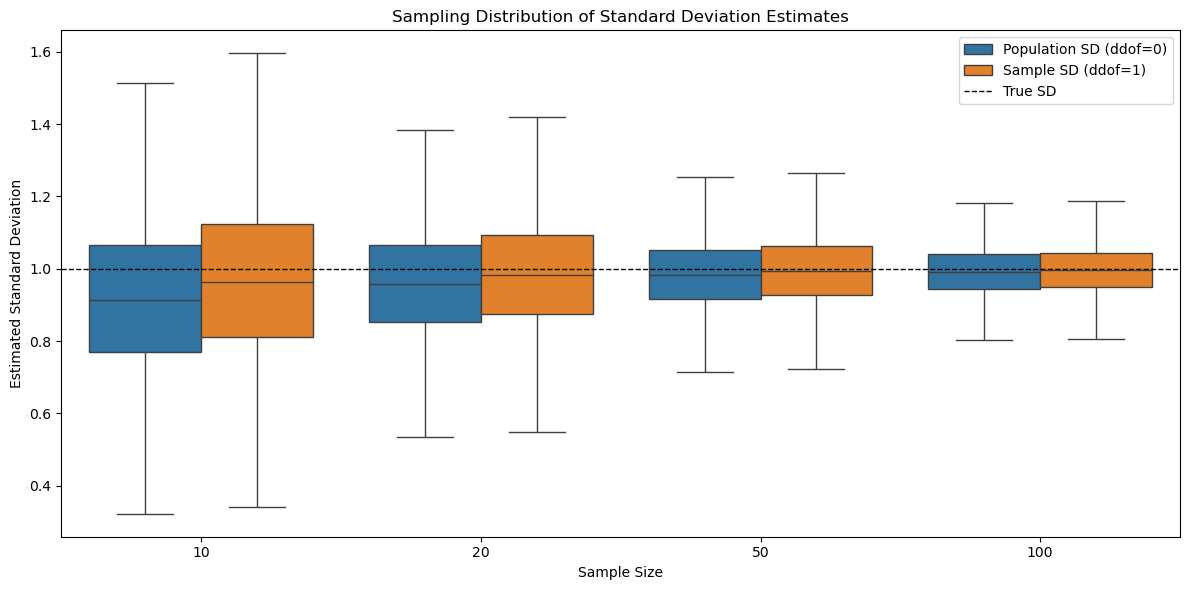

In [109]:
# Create a blank figure
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
plt.figure(figsize=(12, 6))

# Plot the data using seaborn
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(
    data=df_samples,
    x="Sample Size",
    y="SD",
    hue="Estimator",
    showfliers=False
)
# Add a horizontal line for the true standard deviation
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline
plt.axhline(1, color="black", linestyle="--", linewidth=1, label="True SD")

# Label the plot
# 
plt.title("Sampling Distribution of Standard Deviation Estimates")
plt.ylabel("Estimated Standard Deviation")
plt.legend()
plt.tight_layout()
plt.show()

This boxplot clearly shows that as the sample size increases the spread of the data decreases. For all sample sizes the sample standard deviation is closest to the true standard deviation.

When completing surveys and sampling, lots of thought is put into selecting the correct sample size. For example, in manufacturing where the sample might be tested to destruction the sample needs to be big enough to give confidence that the manufacturing process is happening as expected without negatively impacting the output. For non-destructive or risky tests, for example measuring the height of people of a particular age a bigger sample could be used to give greater accuracy.

## Problem 3: t-Tests
This problem investigates t-tests and how often it fails to reject a false null null hypothesis eg the frequency of a change actually happening, but the test does not find it.

First let's import the packages we are going to need.

In [ ]:
# Numerical arrays
# https://numpy.org/doc/2.3/user/index.html#user
import numpy as np

# Statistical functions.
# https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy.stats as stats

# Plotting
# https://matplotlib.org/stable/index.html
import matplotlib.pyplot as plt

# Statistical plots
# https://seaborn.pydata.org/
import seaborn as sns

T-tests try to see if there is a difference between the peak of two datasets. If we plot a chart with two normal distributions using numpy.linspace to generate a 1,000 points between -4 and 4 and then scipy.stats.norm.pdf see official documentation to plot those values to a normal distribution and let's plot the data on the same chart with different 
 values of 0 and 1.

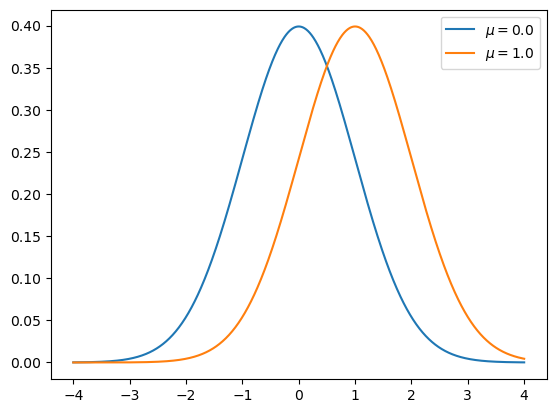

In [111]:
# New axes
fig, ax = plt.subplots()

# X values
# https://www.geeksforgeeks.org/python/numpy-linspace/
x = np.linspace(-4.0, 4.0, 1000)

# Two normal distributions
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
ax.plot(x, stats.norm.pdf(x, 0.0, 1.0), label=r'$\mu = 0.0$')
ax.plot(x, stats.norm.pdf(x, 1.0, 1.0), label=r'$\mu = 1.0$')

ax.legend()

In this chart you can see the two peaks have a large amount of overlap, but the mean, the peak, is clearly a different value. Why is this useful? In many studies we want to see if the intervention we have made has made a difference, for example does 15 minutes of yoga before school reduce the self-reported feeling of stress at bedtime.

T-tests can be used to test the null hypothesis, that our intervention has no impact. When a test does not reject the null hypothesis even though it is false, this is called a type II error. Type I and type II errors are well explained here. A type II error would mean that we believe our intervention has made no difference, even when it has.

### How to perform a t-test
First let's create two groups of data with 30 data points, group A and B, which follow a normal distribution using numpy.random.normal, see official documentation

In [112]:
# Create two groups of normally distributed data
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
groupa = np.random.normal(0.0, 1.0, 30)
groupb = np.random.normal(1.0, 1.0, 30)

# Show the groups
groupa, groupb

(array([ 0.03754521,  0.79464453, -0.45957777,  0.11996677, -0.8664245 ,
         0.49460218, -0.25413355,  1.12882893, -0.71648213, -1.04868994,
        -0.58542253,  1.49482542, -0.53329255, -0.35424407,  0.00632738,
         0.6598095 ,  1.21805317, -0.1415834 ,  0.90475648,  1.12645228,
         0.13495812,  1.90910357, -2.31652991,  0.11685793,  2.02599604,
        -1.580619  ,  1.12738764,  0.15987344,  0.25242254,  1.05168652]),
 array([-1.3782801 , -0.91473162,  1.21311001,  1.17804807,  2.01435221,
         1.68661652,  0.02155326,  0.7544778 ,  0.98014563, -0.63115092,
        -0.98633582,  2.87185354,  2.12108901,  2.63034265,  2.20454138,
         0.81224797,  2.31836598,  2.75194418,  2.35244686,  2.75223432,
        -0.47017938, -0.54137728,  1.93817041,  0.97295435,  1.50799658,
        -0.56003086,  1.33039966,  0.54777798,  2.69086617,  2.00230495]))

Let's plot this data on a histogram to visualise this information using ax.hist see official documentation

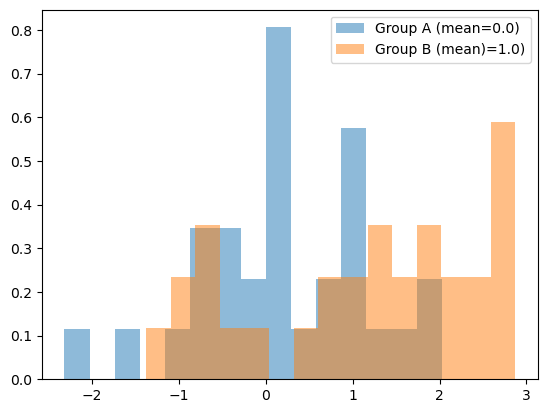

In [113]:
# New axes.
fig, ax = plt.subplots()

# Plot the two groups
ax.hist(groupa, alpha=0.5, label='Group A (mean=0.0)', bins=15, density=True)
ax.hist(groupb, alpha=0.5, label='Group B (mean)=1.0)', bins=15, density=True)
ax.legend()

A small pvalue denotes that there is a low chance that the population means are equal. Normally, if the pvalue is less than 0.05 we reject the null hypothesis. This depends on the importance and impact of a false positive.

### Defining the problem
The set problem asks that two samples of size 100 are drawn. One of the samples is the standard normal distribution and the other is the normal distribution with with mean d and standard deviation 1. d is to be defined as all values between 0 and 1.0 inclusive, increasing by 0.1 each time, so 0, 0.1, 0.1, ... all the way to one. These simulations should be run 1,000 times.

To solve the problem first, let's create an array of our mean differences using np.arange see official documentation. The three parameters for this function are start, stop and the size of the step. So we want to start at 0.0, stop before 1.1, and increase each value by 0.1.

In [114]:
# Create an array for the mean difference
# https://numpy.org/doc/stable/reference/generated/numpy.arange.html
d = np.arange(0,1.1,0.1)

# Show the array
d

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Now let's create variables for the rest of the simulation parameters. We are going to use 0.05 as the pvalue, so if there is only a 1 in 20 (or below) probability that the change is due to chance, then accept that the populations are different. I'll store this in a value called significance.

In [115]:
# Define simulation parameters
n_simulations = 1000  # Number of simulations per mean difference
sample_size = 100     # Size of each sample
significance = 0.05  # Significance level
standard_deviation = 1.0  # Standard deviation of the normal distributions

# Print the parameters
print(f"Mean differences to test: {d}")
print(f"Number of simulations per difference: {n_simulations}")
print(f"Sample size: {sample_size}")
print(f"Significance level (α): {significance}")
print(f"Standard deviation of populations: {standard_deviation}")

Mean differences to test: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Number of simulations per difference: 1000
Sample size: 100
Significance level (α): 0.05
Standard deviation of populations: 1.0


Let's first set out the code to create two samples, using our variable names. For this test I am going to use a mean difference of 0.5 to check the code.

In [116]:
# Generate two samples of normally distributed data
sample1 = np.random.normal(0, standard_deviation, sample_size)           # Standard normal (mean=0, standard deviation=1)
sample2 = np.random.normal(0-0.5, standard_deviation, sample_size)        # Mean shifted by 0.5

Then perform the t-test, and store the pvalue in a variable, called p_value so we can compare this to our significance threshold value.

In [117]:
# Perform independent samples t-test
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
t_stat, p_value = stats.ttest_ind(sample1, sample2)

Our problem asks us to reject the null hypothesis if the p-value is less than 0.05 and record the number of times the null hypothesis is not rejected, so let's add this to our code.

In [118]:
# Check if null hypothesis is not rejected e.g. is the p-value greater than or equal to our significance level?
p_value >= significance

False

Now let's build all these elements into a function to complete the required number of simulations and store the number of times the null hypothesis is not rejected. There is some useful information at https://pythonguides.com/define-a-function-in-python/ on how to define a function. Within the function we need to iterate through each of the different mean differences, this can be done with a for loop as explained in https://www.w3schools.com/python/python_for_loops.asp.

In [134]:
# Build a function to simulate Type II error rate
# https://pythonguides.com/define-a-function-in-python/
def simulate_type_ii_error(d, n_simulations, sample_size, significance):
    # Initialise a variable to store the number of rejections
    type_ii_count = 0
    
    # Loop through the number of simulations
    # https://www.w3schools.com/python/python_for_loops.asp
    for i in range(n_simulations):
        # Generate two samples
        sample1 = np.random.normal(0, 1, sample_size)           # Standard normal (μ=0, standard deviation =1)
        sample2 = np.random.normal(0-d, 1, sample_size)           # Normal with mean=d, standard deviation =1
        
        # Perform independent samples t-test and record only the p-value
        _, p_value = stats.ttest_ind(sample1, sample2)
        
        # Check if reject null hypothesis
        if p_value >= significance:
            # Increment the number of rejections
            type_ii_count += 1
            
    # Calculate the proportion of simulations where we did not reject the null hypothesis
    type_ii_error_rate = type_ii_count / n_simulations
    
    # Return the Type II error rate
    return type_ii_error_rate

Now let's run our code for each of the different mean differences values. Create a variable to store the type II error rate for each of the mean differences and use .append() to add data for each mean difference to the list, see documentation.

In [135]:
# Create an blank list to hold Type II error rates and the associated mean difference
type_ii_rates = []

# Iterate over different mean differences
# https://www.w3schools.com/python/python_for_loops.asp
for mean_diff in d:
    # Calculate Type II error rate for this mean difference
    rate = simulate_type_ii_error(mean_diff, n_simulations, sample_size, significance)
    # Append the mean difference and the corresponding Type II error rate to the list
    # https://docs.python.org/3/library/stdtypes.html#list.append
    type_ii_rates.append((mean_diff, rate))
    
    # Print the mean difference and the corresponding Type II error rate
    print(f"d = {mean_diff}: Type II error rate = {rate}")

d = 0.0: Type II error rate = 0.951
d = 0.1: Type II error rate = 0.898
d = 0.2: Type II error rate = 0.706
d = 0.30000000000000004: Type II error rate = 0.442
d = 0.4: Type II error rate = 0.196
d = 0.5: Type II error rate = 0.06
d = 0.6000000000000001: Type II error rate = 0.015
d = 0.7000000000000001: Type II error rate = 0.003
d = 0.8: Type II error rate = 0.0
d = 0.9: Type II error rate = 0.0
d = 1.0: Type II error rate = 0.0



Let's extract that data into two variables so it is easy to plot.

In [136]:
# Create an blank list to hold Type II error rates and the associated mean difference
type_ii_rates = []

# Iterate over different mean differences
# https://www.w3schools.com/python/python_for_loops.asp
for mean_diff in d:
    # Calculate Type II error rate for this mean difference
    rate = simulate_type_ii_error(mean_diff, n_simulations, sample_size, significance)
    # Append the mean difference and the corresponding Type II error rate to the list
    # https://docs.python.org/3/library/stdtypes.html#list.append
    type_ii_rates.append((mean_diff, rate))
    
    # Print the mean difference and the corresponding Type II error rate
    print(f"d = {mean_diff:.1f}: Type II error rate = {rate:.3f}")

d = 0.0: Type II error rate = 0.951
d = 0.1: Type II error rate = 0.891
d = 0.2: Type II error rate = 0.683
d = 0.3: Type II error rate = 0.428
d = 0.4: Type II error rate = 0.214
d = 0.5: Type II error rate = 0.053
d = 0.6: Type II error rate = 0.012
d = 0.7: Type II error rate = 0.002
d = 0.8: Type II error rate = 0.001
d = 0.9: Type II error rate = 0.000
d = 1.0: Type II error rate = 0.000


Let's store this data in a `pandas.dataframe`, see [official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

In [137]:
# Convert the list of Type II error rates to a DataFrame
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
type_ii_df = pd.DataFrame(type_ii_rates, columns=['Mean Difference (d)', 'Type II Error Rate'])

Looking at this data, we can see that as the mean difference increases it is easier for the t-test to discern the difference between the two samples, reducing the chance of a type II error.

Now let's plot the data for the type II error rate against the mean difference. 

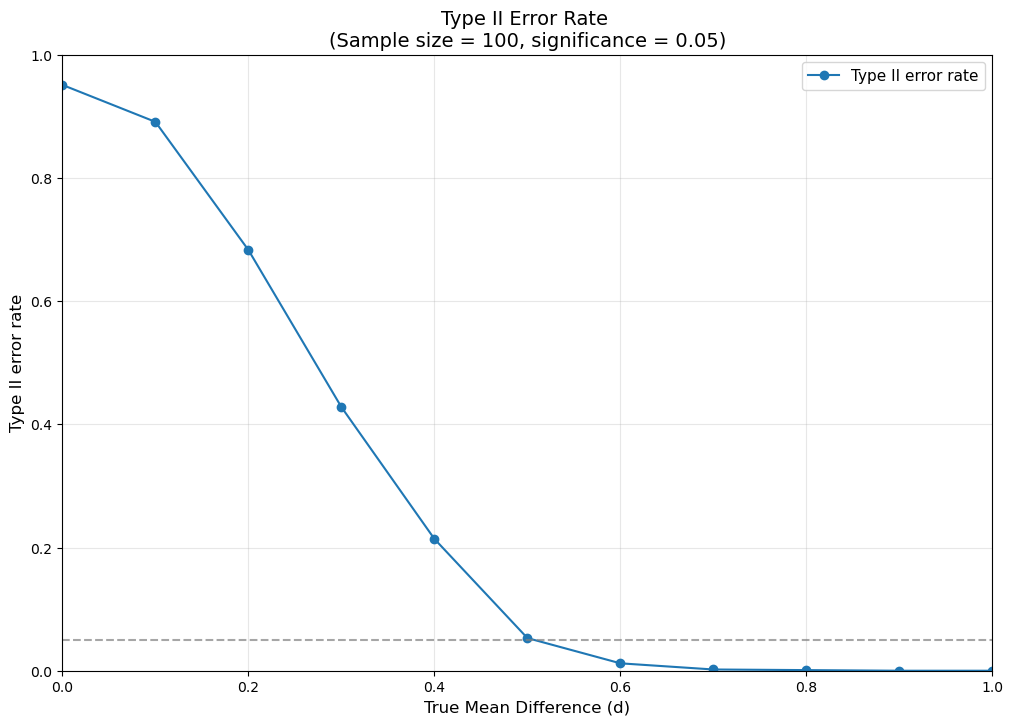

In [138]:
# Plot Type II error rate vs true mean difference
#  Create a blank figure
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the Type II error rates
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot
ax.plot(type_ii_df["Mean Difference (d)"], type_ii_df["Type II Error Rate"], marker='o', label='Type II error rate')

# Set labels and title
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set
ax.set_xlabel('True Mean Difference (d)', fontsize=12)
ax.set_ylabel('Type II error rate', fontsize=12)
ax.set_title('Type II Error Rate \n(Sample size = 100, significance = 0.05)', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)
ax.set_ylim(0, 1)
ax.set_xlim(0, max(d))

# Reference line at significance of 0.05
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axhline.html
ax.axhline(y=0.05, color='gray', linestyle='--', alpha=0.7, label='significance = 0.05')


This chart clearly shows that at a mean difference of about 0.52 a t-test is a able to accurately discern that the null hypothesis should be rejected in a sample of 30 normally distributed data points.

This chart could be further enhanced by adding error bars to show the uncertainty of the estimate. The standard error is calculated using sqrt(p*(1-p)/n).

In [142]:
# Compute standard errors using binomial formula: sqrt(p*(1-p)/n)
se = np.sqrt(type_ii_df["Type II Error Rate"] * (1 - type_ii_df["Type II Error Rate"]) / n_simulations)

# Show the standard errors
se

0     0.006826
1     0.009855
2     0.014714
3     0.015647
4     0.012969
5     0.007085
6     0.003443
7     0.001413
8     0.000999
9     0.000000
10    0.000000
Name: Type II Error Rate, dtype: float64

Now let's plot the data with error bars, using `matplotlib.pyplot.errorbar`, see [official documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html).

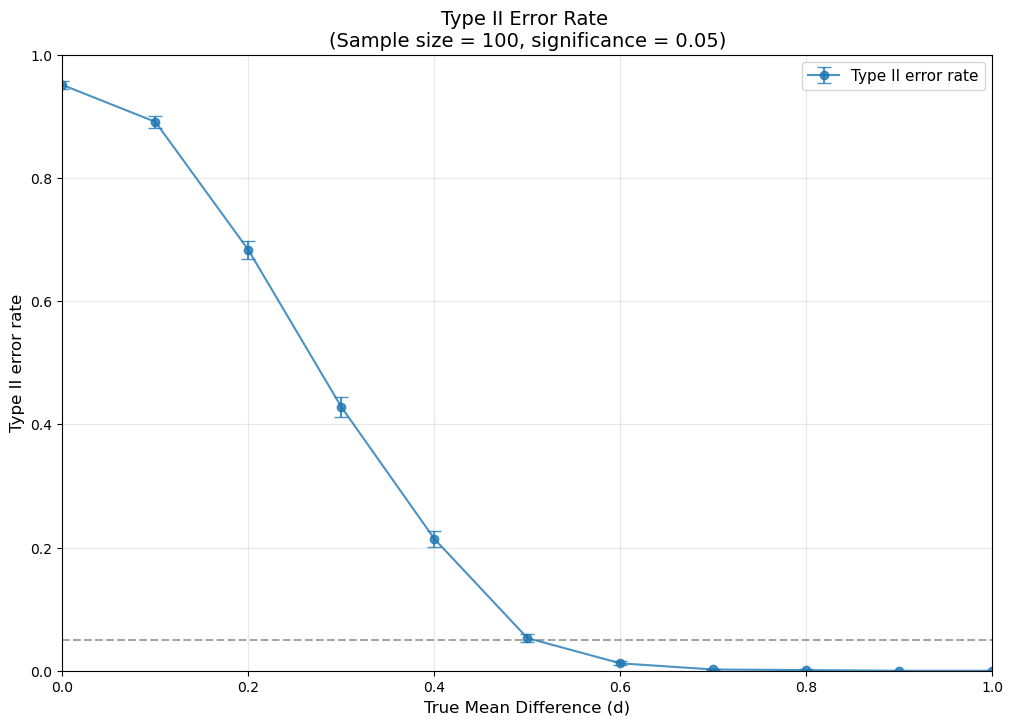

In [143]:
# Plot Type II error rate vs true mean difference
#  Create a blank figure
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig, ax = plt.subplots(figsize=(12, 8))

# Plot with error bars
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html
ax.errorbar(type_ii_df["Mean Difference (d)"], type_ii_df["Type II Error Rate"], 
            yerr=se, marker='o', capsize=5, label='Type II error rate', linestyle='-', alpha=0.8)

# Set labels and title
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set
ax.set_xlabel('True Mean Difference (d)', fontsize=12)
ax.set_ylabel('Type II error rate', fontsize=12)
ax.set_title('Type II Error Rate \n(Sample size = 100, significance = 0.05)', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)
ax.set_ylim(0, 1)
ax.set_xlim(0, max(d))

# Reference line at significance of 0.05
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axhline.html
ax.axhline(y=0.05, color='gray', linestyle='--', alpha=0.7, label='significance = 0.05')

### How Type II rate changes with the difference in means
When there is truly to difference in the means we correctly accept that there is no difference in the population means about 95% of the time. The remaining 5% are Type I errors (false positives) due to 
 = 0.05. At the other end of the scale when the mean difference is 1, there is a very low chance that the population means are the same and we should reject the null hypothesis. The larger the effect the easier it is to detect. What causes this, why does the type II error rate decrease with larger effects:

Statistical sensitivity - larger differences create greater separation between the null and alternative distribution. If they were drawn on a chart there would be no or very little overlap. This makes it easier for the t-test to 'see' the difference.
Signal to noise ratio - noise in this circumstance relates to the change happening by chance alone. As the effect size (d) decreases, the true difference (signal) becomes larger relative to the noise (random variation) improving detection.
Test statistic size - the t-statistic is directly proportional to the size of the effect (d). Larger effects produce larger t-values.
Knowing this effect is important in choosing the correct limits. For example in a clinical trial where you want to pick up small but import effects like an increase likelihood of a heart attack a mean difference of 0.3 or less may be used along with a small p-value. For quality control, where you are looking for large effects within a small sample a mean difference of greater than 0.8 may be used.

## Problem 4: ANOVA
This problem asks for three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1. Then using a one-way ANOVA to test whether all three means are equal. 

First let's import the needed tools:
* `numpy` to create the samples
* `scipy.stats` to complete the statistical analysis
* `statsmodels`

In [ ]:
# Numerical arrays
# https://numpy.org/doc/2.3/user/index.html#user
import numpy as np

# Statistical functions
# https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy.stats as stats

# Further statistical functions
# https://www.statsmodels.org/stable/user-guide.html
import statsmodels as sm

[ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance), or Analysis of Variance, is used when we want to compare more than two groups. It compares the variation between the group means to the amount of variation within each group. If the variation between the groups is substantially larger than the variation within the group, ANOVA suggests that the group means are likely to be different.

### Creating the samples
First, the problem asks up to generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1, so let's start there. To generate the samples use `numpy.random.normal` with the parameters, mean, standard deviation and sample size, see [official documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html).

In [153]:
# Set the parameters for the samples
size = 30
sd_pop = 1.0

# Generate three samples from normal distributions with different means
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
sample0 = np.random.normal(0, sd_pop, size)
sample1 = np.random.normal(0.5, sd_pop, size)
sample2 = np.random.normal(1.0, sd_pop, size)

### One-way ANOVA
ANOVa is used to see if there is a "statistically difference between the means of three or more independent groups", see [Statology for more information](https://www.statology.org/differences-between-anova-ancova-manova-mancova/). The set problem asks us to use one-way ANOVA, this is used to determine how one factor impacts the output variable. Two-way ANOVA would be used to review how two factors impact an output variable and to see if there is an interaction between the two factors.

To perform a one-way ANOVA we will use `scipy.stats.f_oneway`, see [official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html). The outputs are the f statistic and the p-value. The f-statistic measures how much variation with each group against the variation between groups. This value helps separate the groups. The larger the f-statistic, the greater the variation between the means of the samples relative to the variation within the samples and hence, there is stronger evidence that there is a difference between the group means. There is a good description of the f-statistic at [https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/](https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/). The p-value helps us to decide how likely the change is due to chance. The lower the p-value the more likely that the change is statistically significant.

In [154]:
# Perform ANOVA test
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
f_stat, p_value = stats.f_oneway(sample1, sample2, sample3)

# Show
f_stat, p_value

(3.1152493009957567, 0.049353071988260555)

If the p-value is less than 0.05, indicating that the change between the groups is statistically significant and we reject the null hypothesis that each group mean is equal. 

Unfortunately, ANOVA does not tell you which groups only that in comparing the groups some were found to be different. Popular options to determine which groups differ from each other are:
* Tukey test - enables pair-wise comparisons when the sample sizes for each group are equal.
* Bonferroni Test - used when there are planned comparisons and creates narrow confidence intervals.
* Scheffe Test - allows comparison of more than two means at once, it is a conservative test and often produces the widest confidence intervals. The sample sizes can be different.

[Statology](https://www.statology.org/tukey-vs-bonferroni-vs-scheffe/) has a good guide on when to use each of the tests. 

### Tukey's HSD Test
Let's run Tukey's HSD Test on our data to see which groups have statistically significant differences. The function is `scipy.stats.tukey_hsd`, see [official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html).

In [155]:
# Perform Tukey's HSD test
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
res =stats.tukey_hsd(sample1, sample2, sample3)

# Show
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.592     0.059    -1.202     0.018
 (0 - 2)     -0.502     0.127    -1.112     0.107
 (1 - 0)      0.592     0.059    -0.018     1.202
 (1 - 2)      0.090     0.934    -0.520     0.700
 (2 - 0)      0.502     0.127    -0.107     1.112
 (2 - 1)     -0.090     0.934    -0.700     0.520



The function creates a table with the comparisons done in the left hand column and the statistics for the each comparison on the relevant row. The p-value is the same when sample 1 is compared to sample 0 and in the other direction. Any p-value less than our chosen significance level indicates that the samples are different.

### Three independent two-sample t-tests
Let's compare this output against manually to comparing each of the sample against each other using t-tests. The function we will use is `stats.ttest_ind`, see[official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). Once again, when the p-value is less than 0.05, we will consider the change to be significant. 

In [156]:
# Perform pairwise t-tests
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
t_stat1, p_value1 = stats.ttest_ind(sample0, sample1)
t_stat2, p_value2 = stats.ttest_ind(sample0, sample2)
t_stat3, p_value3 = stats.ttest_ind(sample1, sample2)

# Show the p-values
print(f"The p-value when comparing sample 0 and sample 1 is: {p_value1}")
print(f"The p-value when comparing sample 0 and sample 2 is: {p_value2}")
print(f"The p-value when comparing sample 1 and sample 2 is: {p_value3}")

The p-value when comparing sample 0 and sample 1 is: 0.18681215443036941
The p-value when comparing sample 0 and sample 2 is: 0.0015005342448426208
The p-value when comparing sample 1 and sample 2 is: 0.03659841065956175


Let's create a counter to see the number of times the null hypothesis is rejected when the p-value is greater than 0.05.

In [157]:
# Count the number of rejections at alpha = 0.05
alpha = 0.05

# Initialise rejection count
rejections = 0

# Check each p-value against alpha
# https://www.w3schools.com/python/python_conditions.asp
if p_value1 < alpha:
    rejections += 1
    
if p_value2 < alpha:
    rejections += 1

if p_value3 < alpha:
    rejections += 1
    
# Show the number of rejections
rejections

2

### Why is ANOVA preferred over several t-tests
If your significance level is set at 0.05 there is a 1 in 20 chance that you will get a false positive result. Therefore, if you run multiple t-tests you are more likely to come across a false positive, this inflating the false positives. Also, ANOVA enables quick, easy test across multiple groups with one test highlighting when to use a pair-wise test like Tukey's Test to find the particular groups where the change is significance. By ANOVA using a group variance, there is greater discerning power in the test than pairwise t-tests.

## End